In [30]:
import numpy as np

In [31]:
import matplotlib.pyplot as plt

In [32]:
def generate_normal_sample(a, d, n):
    return np.random.normal(a, d, n)

In [33]:
def polynom(a, x):
    res = np.zeros(len(x))
    for i in range(len(a)):
        res *= x
        res += a[i]
    return res

In [34]:
def polynomial_regression(x, y, m):
    n = len(x)
    X = np.empty((n, m))
    for i in range(n):
        x_pow = 1
        for j in range(m):
            X[i][j] = x_pow
            x_pow *= x[i]

    A = X.T @ X
    B = X.T @ y
    g = np.linalg.solve(A, B)
    return g[::-1]

In [35]:
def mean(a):
    return sum(a) / len(a)

In [36]:
from math import sqrt


def distances(x, y, center):
    xc, yc = center[0], center[1]
    return list(map(lambda xiyi: 
                    sqrt((xiyi[0] - xc) ** 2 + (xiyi[1] - yc) ** 2),
                    zip(x, y)))

In [37]:
from scipy import optimize


def circle_regression(x, y):
    def distances_from_mean(center):
        dist = distances(x, y, center)
        dist = np.array(dist)
        return dist - mean(dist)

    start_center = np.array([0, 0])
    estimated_center, _ = optimize.leastsq(distances_from_mean, start_center)
    dist = distances(x, y, estimated_center)
    R = mean(dist)

    return estimated_center, R

In [38]:
def polynomial_regression_plot(x, y1, y2):
    fig, ax = plt.subplots()
    ax.plot(x, y1, 'o', color='black')
    ax.plot(x, y2, color='red')
    plt.plot()
    plt.show()

In [39]:
def circle_regression_plot(x, y, center, R):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o', color='black')
    circle = plt.Circle((center[0], center[1]), R, color='red', fill=False)
    ax.add_artist(circle)
    plt.plot()
    plt.show()

[ 1.06787601  2.52441348 -5.68681873 -5.22144919]


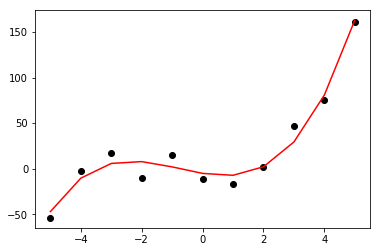

In [40]:
n = 5
a = [1, 2, -4, 0]
x = list(range(-n, n + 1))
y = polynom(a, x)
y = np.array(y) + generate_normal_sample(0, 9, 2 * n + 1)
g = polynomial_regression(x, y, len(a))

print(g)
polynomial_regression_plot(x, y, polynom(g, x))

[ 5.18218041 -3.60624769] 49.765210254843424


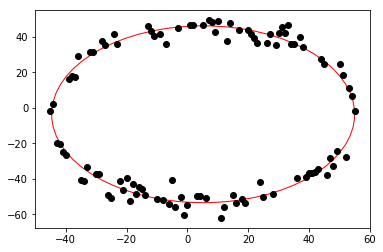

In [41]:
from random import randint


n = 50
xc, yc = (5, -4)
R = n
x = list(range(-n + xc, n + 1 + xc))
y = list(map(lambda xi: 
             yc + (1 - 2 * randint(0, 1)) * sqrt(R ** 2 - (xi - xc) ** 2), 
             x))
y = np.array(y) + generate_normal_sample(0, 4, 2 * n + 1)
center, Rr = circle_regression(x, y)

print(center, Rr)
circle_regression_plot(x, y, center, Rr)